# Chapter Goals
- Evaluation metrics, their interpretation, and use-cases.

# Lab Goals
- Computing, Visualizing, and contrasting metrics.
- Tuning models by them is left to students as an exercise.

# General Guidlines
- Visualization.
- Modifiable code snippets.

---

In [ ]:
# Loading a dataset
# dataset names: "airline", "breast-cancer", "contact-lenses", "cpu", "cpu.with.vendor", "credit-g", "diabetes", "glass", "hypothyroid", "ionosphere", "iris.2D", "iris", "labor", "segment-challenge", "segment-test", "soybean", "supermarket", "unbalanced", "vote", "weather.nominal", "weather.numeric"
# df = pd.read_csv("data/weather.numeric.csv")
# instances = loader.load_file("data/weather.numeric.arff")

# Modules & Datasets Setup

In [1]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev libxkbfile1
  libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  default-jdk default-jdk-headless default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
0 upgraded, 18 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,518 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
G

In [2]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175924 sha256=1bc630eb972d7350e3d3c7c7057c0916af680130825c6cd1c7d3ba1952548983
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp310-cp310-linux_x86_64.whl size=1743149 sha256=a16a8415f7ad60e2319d93e253f6a5e14562fd57955f39c886b92b4d925eb3b5
  Stored in directory: /root/.cache/pip/wheels/35/58/be/c5d71b71a9dd6585f897fa5b2d021e03962eb30d6b20797396
Successfully built python-javabridge
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 689.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [3]:
# @title
#Restart runtime after installing the dependencies

In [4]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [5]:
# @title
data_dir = 'data'

In [6]:
# @title
#!rm -r weka
#!rm -r data

In [7]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [8]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

--2023-10-29 12:57:22--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/airline.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2357 (2.3K) [text/plain]
Saving to: ‘data/airline.arff’

airline.arff        100%[===================>]   2.30K  --.-KB/s    in 0s      

2023-10-29 12:57:24 (1.42 GB/s) - ‘data/airline.arff’ saved [2357/2357]

--2023-10-29 12:57:24--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/breast-cancer.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29418 (29K) [text/plain]
Saving to: ‘data/breast-cancer.arff’

breast-cancer.arff  100%[===================>]  28.73K  

In [9]:
# @title
import weka.core.packages as packages
packages.install_package("simpleEducationalLearningSchemes")

from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")

# 5.1 Training and Testing

In [ ]:
# train test split
# accuracy score

# modules
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


**Task 1.1** Experiment by modifying the test-train size, Hypothesize and explain observations.

**Task 1.2** What is the best test-train size?

# 5.2 Predicting Performance

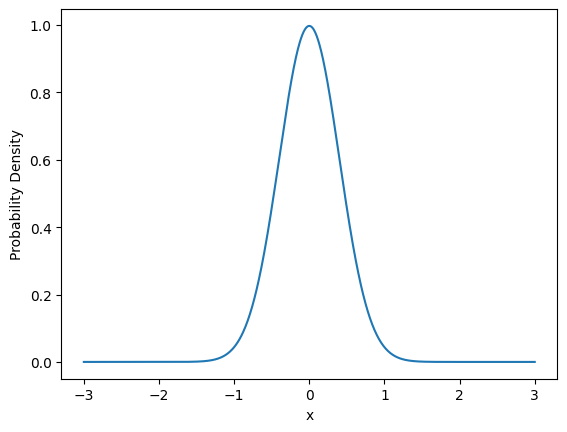

In [ ]:
# normal distribution

# modules
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the normal distribution (mean and standard deviation)
mean = 0.0
std_dev = 0.4

# Create an array of x values for the plot
x_values = np.linspace(-3, 3, 1000)

# Calculate the corresponding probability density function (PDF) values
pdf_values = stats.norm.pdf(x_values, loc=mean, scale=std_dev)

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the PDF curve
ax.plot(x_values, pdf_values, label="PDF")

# Set labels and a legend
ax.set_xlabel("x")
ax.set_ylabel("Probability Density")

# Display the plot
plt.show()

In [ ]:
# probability on a distribution

# Calculate the probability of x >= 0.3
probability = 1 - stats.norm.cdf(0.3, loc=mean, scale=std_dev)

# Print the result
print(f"Probability(x >= 0.3) = {probability:.4f}")

Probability(x >= 0.3) = 0.2266


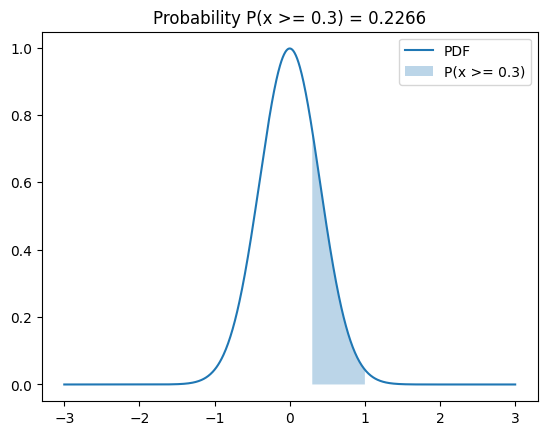

In [ ]:
# Area under the curve filled

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the PDF curve
ax.plot(x_values, pdf_values, label="PDF")

# Fill the area under the curve for x >= 0.3
x_fill = np.linspace(0.3, 1, 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=mean, scale=std_dev)
ax.fill_between(x_fill, pdf_fill, alpha=0.3, label="P(x >= 0.3)")

ax.set_title(f"Probability P(x >= 0.3) = {probability:.4f}")
ax.legend()

# Display the plot
plt.show()

**Task 2.1** Modify parameters of the normal distribution and observe the corresponding graph, and probability of the interval.

# 5.3 Cross-Validation

In [ ]:
# cross-validation

# modules
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Perform 5-fold cross-validation and calculate the accuracy scores
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy scores for each fold and the mean accuracy
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.2f}")

mean_accuracy = np.mean(scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Fold 1: Accuracy = 0.97
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.90
Fold 4: Accuracy = 0.97
Fold 5: Accuracy = 1.00
Mean Accuracy: 0.96


**Task 2.1** Experiment by modifying folds size, Hypothesize and explain observations.

**Task 2.2** What is the distinguishing feature of cross validation?

# 5.4 Other Estimators

## Leave One Out

In [10]:
# leave one out

from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Initialize variables to keep track of total accuracy and the number of iterations
total_accuracy = 0
num_iterations = 0

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Measure the accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Update the total accuracy and the number of iterations
    total_accuracy += accuracy
    num_iterations += 1

# Calculate the mean accuracy over all iterations
mean_accuracy = total_accuracy / num_iterations

print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 0.94


**Task 4.1** In which case leave-one-out is most useful?

## Bootstrap

In [16]:
# Mean

import numpy as np

# Original dataset
data = np.array([15, 20, 21, 22, 24, 25, 28, 30, 31, 35, 40, 42, 45, 50])

# Number of bootstraps
num_bootstraps = 10

# Initialize an array to store bootstrapped sample means
bootstrapped_means = np.zeros(num_bootstraps)

# Perform bootstrapping
for i in range(num_bootstraps):
    # Generate a random sample with replacement from the original data
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)

    # Calculate the mean of the bootstrapped sample
    bootstrapped_means[i] = np.mean(bootstrap_sample)

# Print the results
print(f"Original Data Mean: {np.mean(data):.2f}")
print(f"Bootstrap Mean: {np.mean(bootstrapped_means):.2f}")

Original Data Mean: 30.57
Bootstrap Mean: 29.56


In [18]:
# Linear Regression

import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Number of bootstraps
num_bootstraps = 10

# Initialize arrays to store bootstrapped regression coefficients
bootstrapped_coeffs = np.zeros((num_bootstraps, 2))  # Two coefficients: intercept and slope

# Perform bootstrapping
for i in range(num_bootstraps):
    # Generate a random sample with replacement
    indices = np.random.choice(len(X), size=len(X), replace=True)
    X_bootstrap = X[indices]
    y_bootstrap = y[indices]

    # Fit a linear regression model to the bootstrapped sample
    model = LinearRegression()
    model.fit(X_bootstrap, y_bootstrap)

    # Store the intercept and coefficient (slope)
    bootstrapped_coeffs[i, 0] = model.intercept_
    bootstrapped_coeffs[i, 1] = model.coef_

# Calculate the confidence intervals for the intercept and coefficient (slope)
confidence_intervals = np.percentile(bootstrapped_coeffs, [2.5, 97.5], axis=0)

# Print the results
print("Original Regression Coefficients:")
print(f"Intercept: {1:.2f}") # hard-coded in equation above
print(f"Slope: {2:.2f}")

print("\nBootstrap Results:")
print(f"Intercept 95% Confidence Interval: ({confidence_intervals[0, 0]:.2f}, {confidence_intervals[1, 0]:.2f})")
print(f"Slope 95% Confidence Interval: ({confidence_intervals[0, 1]:.2f}, {confidence_intervals[1, 1]:.2f})")

Original Regression Coefficients:
Intercept: 1.00
Slope: 2.00

Bootstrap Results:
Intercept 95% Confidence Interval: (1.00, 1.06)
Slope 95% Confidence Interval: (1.94, 2.05)


**Task 4.2** Construct a dummy data with high variance (i.e many outliers) and apply the same pipeline. In light of results, What is the value of bootstrap?

# 5.5 Hyper-parameter Selection

In [19]:
# train, validate, test splitting

import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the sets
print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 60
Validation Set Size: 20
Testing Set Size: 20


**Task 5.1** Select a model of your choice. Tune it by train-validate-test splitting procedure above. Compare it with tuning only by train-test splitting. Compare accuracies.

**Task 5.2** Experiment and observe whether the above procedure had saved you from over-fitting the model.

# 5.6 Comparing Data Mining Schemes

In [22]:
import numpy as np
from scipy import stats

# Simulated performance metrics for two models (replace with your actual data)
model1_metrics = np.array([0.85, 0.88, 0.82, 0.90, 0.87])
model2_metrics = np.array([0.78, 0.80, 0.75, 0.79, 0.81])

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(model1_metrics, model2_metrics)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Statistically significant difference")
else:
    print("No statistically significant difference")

Statistically significant difference


**Task 6.1** Why do we need to use t-test? Why don't we go with the highest model accuracy?

# 5.7 Predicting Probabilities

In [30]:
# Quadratic Loss Function

# modules
import numpy as np
from sklearn.metrics import mean_squared_error

actual_probabilities = [0.4, 0.4, 0.9]  # Ground truth
predicted_probabilities = [0.65, 0.25, 0.78]  # Model's predictions

mse = mean_squared_error(actual_probabilities, predicted_probabilities)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.03


In [35]:
# Logistic Loss Function

# modules
from sklearn.metrics import log_loss

y_true = [0, 0, 1, 1] # ground truth
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]] # model's predictions

logloss = log_loss(y_true, y_pred)

print(f"Logistic Loss: {logloss:.2f}")

Logistic Loss: 0.17


**Task 7.1** Tune a model based on these metrics. Contrast with your previous approaches.

# 5.8 Counting The Cost

In [36]:
# TP, TN, FP, FN

# modules
from sklearn.metrics import confusion_matrix

# Actual labels (ground truth)
actual_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

# Predicted labels by your model
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Compute the confusion matrix
confusion = confusion_matrix(actual_labels, predicted_labels)

# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Print the results
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1


**Task 8.1** Give a use-case in which these measurements are critical.

**Task 8.2** Which of these metrics do you need to critically optimize?

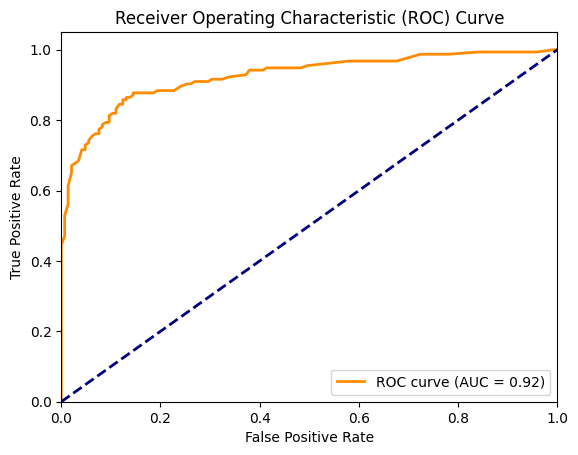

In [37]:

# modules
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate dummy data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Challenge 8.3** Learn more from [here](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc) about other methods. Observe there is a whole new world besides accuracy

**Challenge 8.4** Learn about regularized learning and use above metrics to do it. See [this](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) for example.

# 5.9 Evaluating Numeric Prediction

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Generate some synthetic data for demonstration
np.random.seed(0)
y_true = np.random.rand(20)  # Actual values
y_pred = y_true + np.random.randn(20) * 0.1  # Predicted values with some noise

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Relative Absolute Error (RAE)
rae = np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true - np.mean(y_true)))

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Relative Absolute Error (RAE): {rae:.4f}")

# Compare MSE and RAE
if mse < rae:
    print("MSE is lower, indicating better model performance in terms of mean squared error.")
elif mse > rae:
    print("RAE is lower, indicating better model performance in terms of relative absolute error.")
else:
    print("MSE and RAE are equal, and the model's performance is identical in both metrics.")

Mean Squared Error (MSE): 0.0141
Relative Absolute Error (RAE): 0.4211
MSE is lower, indicating better model performance in terms of mean squared error.


**Challenge 9.1** Check out _table 5.8_ in page 195 from the book. Draw cases where one metric is preferable over another.